<a href="https://colab.research.google.com/github/shounakd56/Image-Caption-Generation-using-Deep-Learning/blob/main/Week%204/WiDS_Week_4_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [ ]:
data1=pd.read_csv("/content/gdrive/MyDrive/WiDS/CV/LSTM_train_week4.csv")

In [ ]:
data1.shape

(505, 15)

In [ ]:
data1

,Date,Price,Open,High,Low,Volume,Chg%,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,4-Jan-21,47.62,48.40,49.83,47.18,528.53K,-1.85%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5-Jan-21,49.93,47.38,50.20,47.24,643.19K,4.85%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-Jan-21,50.63,49.82,50.94,49.48,509.37K,1.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7-Jan-21,50.83,50.53,51.28,50.39,369.29K,0.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8-Jan-21,52.24,50.93,52.75,50.81,499.42K,2.77%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,23-Nov-22,77.94,81.08,81.95,76.83,379.15K,-3.72%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,24-Nov-22,77.95,77.53,78.19,76.92,0,0.01%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,25-Nov-22,76.28,77.51,79.90,76.22,266.45K,-2.14%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,28-Nov-22,77.24,75.93,77.84,73.60,405.03K,1.26%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data1

,Date,Price
0,4-Jan-21,47.62
1,5-Jan-21,49.93
2,6-Jan-21,50.63
3,7-Jan-21,50.83
4,8-Jan-21,52.24
...,...,...
500,23-Nov-22,77.94
501,24-Nov-22,77.95
502,25-Nov-22,76.28
503,28-Nov-22,77.24


In [ ]:
data1.shape

(505, 2)

In [ ]:
price=data1['Price']

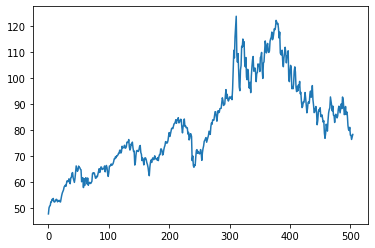

In [ ]:
price.plot()

In [ ]:
price_val=price.values

In [ ]:
normalizer = MinMaxScaler(feature_range=(0,1))
price_scaled = normalizer.fit_transform(np.array(price_val).reshape(-1,1))

In [ ]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [ ]:
time_stamp = 40
X_train, y_train = create_ds(price_scaled,time_stamp)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)


In [ ]:
X_train.shape


(464, 40, 1)

In [ ]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 40, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
8/8 [==============================] - 7s 76ms/step - loss: 0.1060
Epoch 2/100
8/8 [==============================] - 1s 77ms/step - loss: 0.0172
Epoch 3/100
8/8 [==============================] - 1s 77ms/step - loss: 0.0132
Epoch 4/100
8/8 [==============================] - 1s 72ms/step - loss: 0.0088
Epoch 5/100
8/8 [==============================] - 1s 73ms/step - loss: 0.0069
Epoch 6/100
8/8 [==============================] - 1s 72ms/step - loss: 0.0060
Epoch 7/100
8/8 [==============================] - 1s 75ms/step - loss: 0.0055
Epoch 8/100
8/8 [==============================] - 1s 75ms/step - loss: 0.0051
Epoch 9/100
8/8 [==============================] - 1s 73ms/step - loss: 0.0050
Epoch 10/100
8/8 [==============================] - 1s 74ms/step - loss: 0.0049
Epoch 11/100
8/8 [==============================] - 1s 80ms/step - loss: 0.0053
Epoch 12/100
8/8 [==============================] - 1s 74ms/step - loss: 0.0049
Epoch 13/100
8/8 [==============================]

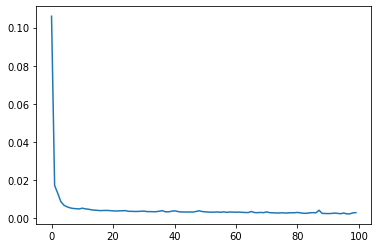

In [ ]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [ ]:
train_predict = model.predict(X_train)


15/15 [==============================] - 4s 17ms/step


In [ ]:
train_predict = normalizer.inverse_transform(train_predict)


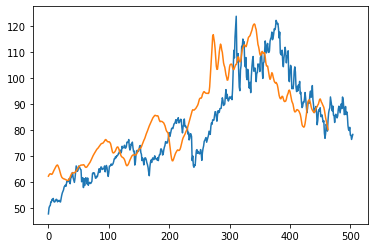

In [ ]:
plt.plot(normalizer.inverse_transform(price_scaled))
plt.plot(train_predict)

In [ ]:
len(price_scaled)

505

In [ ]:
fut_inp = price_scaled[465:]
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)


In [ ]:
tmp_inp = tmp_inp[0].tolist()

In [ ]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=40
i=0
while(i<30):
    
    if(len(tmp_inp)>40):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.40755409002304077], [0.40475019812583923], [0.40440768003463745], [0.4055328965187073], [0.4075878858566284], [0.41028207540512085], [0.41346675157546997], [0.4170570969581604], [0.4210207164287567], [0.42532238364219666], [0.42994508147239685], [0.43485748767852783], [0.44004544615745544], [0.4454931914806366], [0.4511822760105133], [0.4570932984352112], [0.46320709586143494], [0.469512015581131], [0.4759996831417084], [0.48265737295150757], [0.48946669697761536], [0.4964176118373871], [0.5035071969032288], [0.5107122659683228], [0.518034815788269], [0.5254696011543274], [0.5330080389976501], [0.5406346321105957], [0.5483381748199463], [0.5561214089393616]]


In [ ]:
plot_new=np.arange(1,41)
plot_pred=np.arange(41,71)

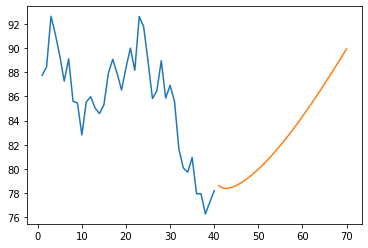

In [ ]:
plt.plot(plot_new, normalizer.inverse_transform(price_scaled[465:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [ ]:
price_new = price_scaled.tolist()


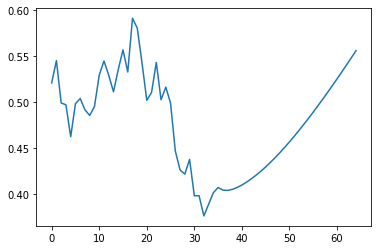

In [ ]:
#Entends helps us to fill the missing value with approx value
price_new.extend(lst_output)
plt.plot(price_new[470:])

In [ ]:
final_graph = normalizer.inverse_transform(price_new).tolist()


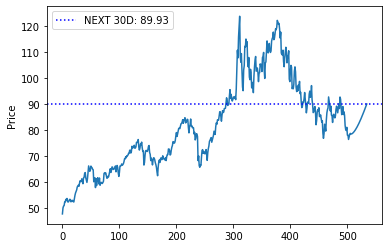

In [ ]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'blue', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()